In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [151]:
#read dataset
df=pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [152]:
df.shape

(51717, 17)

In [153]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [154]:
len(df['name'].unique())

8792

In [155]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

### Getting all NAN features

In [156]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [157]:
#% of missing values
for feature in feature_na:
    print('{} has {} % missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

rate has 15.0337 % missing values
phone has 2.3358 % missing values
location has 0.0406 % missing values
rest_type has 0.4389 % missing values
dish_liked has 54.2916 % missing values
cuisines has 0.087 % missing values
approx_cost(for two people) has 0.669 % missing values


In [158]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [159]:
df.dropna(axis='index',subset=['rate'],inplace=True)

In [160]:
df.shape

(43942, 17)

In [161]:
def split(x):
    return x.split('/')[0]

In [162]:
df['rate']=df['rate'].apply(split)

In [163]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [164]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [165]:
df.replace('NEW',0,inplace=True)

In [166]:
df.replace('-',0,inplace=True)

In [167]:
df['rate']=df['rate'].astype(float)

### Calculate average rating of each restaurant

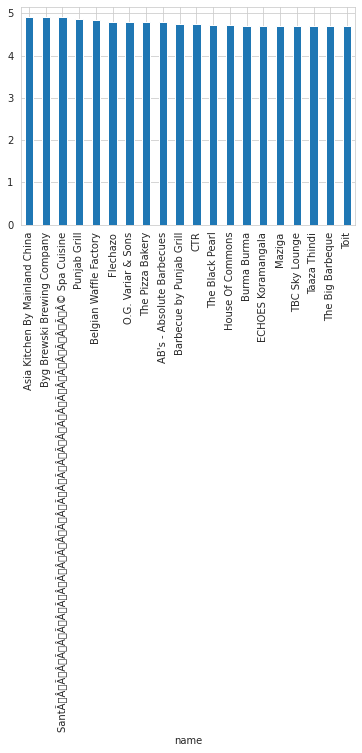

In [168]:
df.groupby('name')['rate'].mean().nlargest(20).plot.bar()

In [169]:
df_rate=df.groupby('name')['rate'].mean().to_frame()
df_rate=df_rate.reset_index()
df_rate.columns=['restaurant','rating']
df_rate.head(20)

,restaurant,rating
0,#FeelTheROLL,3.400000
1,#L-81 Cafe,3.900000
2,#refuel,3.700000
3,1000 B.C,3.200000
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700000
5,11 to 11 Express Biriyanis,3.500000
6,1131 Bar + Kitchen,4.500000
7,12th Main - Grand Mercure,4.100000
8,1441 Pizzeria,4.100000
9,1522 - The Pub,4.212000


### Rating distribution

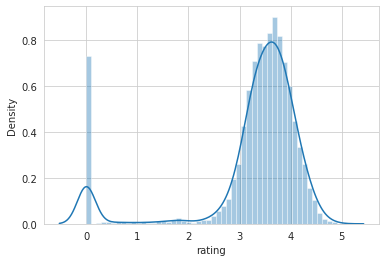

In [170]:
sns.set_style(style='whitegrid')
sns.distplot(df_rate['rating'])

Almost more than 50 percent of restaurants has rating between 3 and 4. Restaurants having rating more than 4.5 are very rare.

### Which are the top restaurant chains in Bangaluru?

Text(0.5, 0, 'Number of outlets')

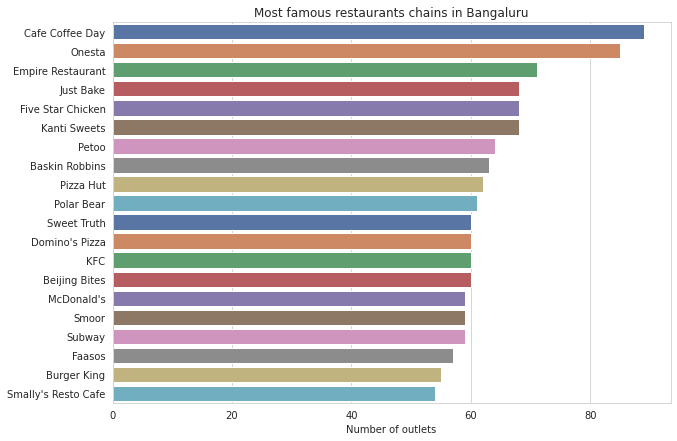

In [171]:
plt.figure(figsize=(10,7))
chains=df['name'].value_counts()[0:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets") 

### How many of the restuarants do not accept online orders?

([<matplotlib.patches.Wedge at 0x7f45cd40fcd0>,
 [Text(-0.481488774517003, 0.9890240442042423, ''),
  Text(0.5252605823084886, -1.0789352717716423, '')],
 [Text(-0.26263024064563795, 0.5394676604750411, '64.4%'),
  Text(0.30640200634661835, -0.629378908533458, '35.6%')])

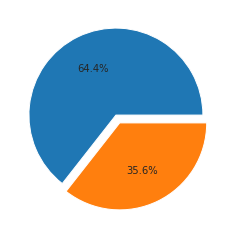

In [172]:
x=df['online_order'].value_counts()
labels=['accepted','not accepted']
plt.pie(x,explode=[0.0,0.1],autopct='%1.1f%%')

### What is the ratio b/w restaurants that provide and do not provide table booking ?

([<matplotlib.patches.Wedge at 0x7f45cd161d90>,
 [Text(-0.9856961240827233, 0.4882654513359477, ''),
  Text(1.0753048626356982, -0.5326532196392153, '')],
 [Text(-0.537652431317849, 0.26632660981960776, '85.4%'),
  Text(0.6272611698708239, -0.31071437812287556, '14.6%')])

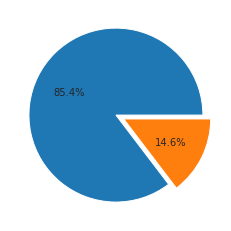

In [173]:
x=df['book_table'].value_counts()
labels=['not book','book']
plt.pie(x,explode=[0.0,0.1],autopct='%1.1f%%')

### How many types of restaurants we have?

In [174]:
df['rest_type'].isna().sum()

151

In [175]:
df['rest_type'].dropna(inplace=True)

In [176]:
df['rest_type'].isna().sum()

151

In [177]:
len(df['rest_type'].unique())

88

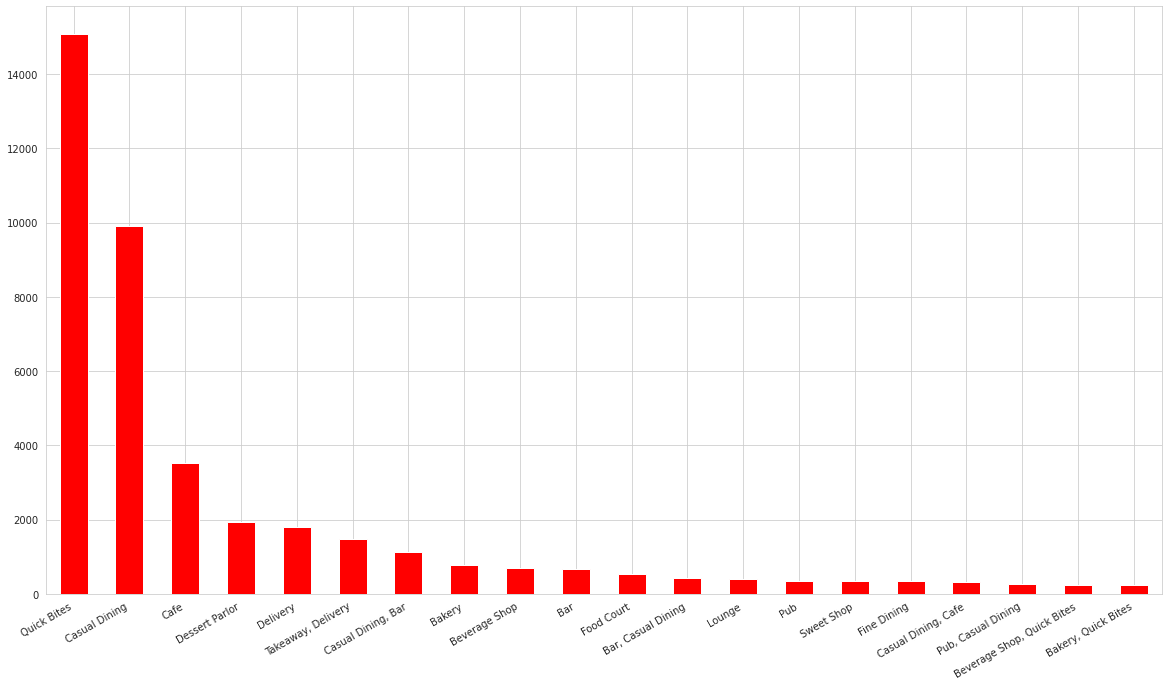

In [178]:
plt.figure(figsize=(20,12))
df['rest_type'].value_counts().nlargest(20).plot.bar(color='red')
plt.gcf().autofmt_xdate()

### highest voted restaurant

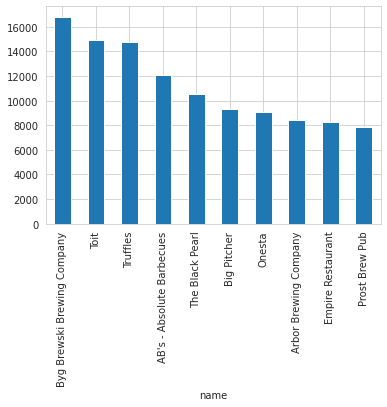

In [179]:
df.groupby('name')['votes'].max().nlargest(10).plot.bar()

now using ploty

In [180]:
!pip install plotly

In [181]:
import plotly.express as px

In [182]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [183]:
trace1 = go.Bar( 
        x = df.groupby('name')['votes'].max().nlargest(10).index,
        y = df.groupby('name')['votes'].max().nlargest(10),
        name= 'name')

### Total restaurants at different locations of Bengalore


In [184]:
df.groupby('location')['name'].unique()

location
BTM                  [Sankranthi Veg Restaurant, Hearts Unlock Cafe...
Banashankari         [Jalsa, Spice Elephant, San Churro Cafe, Addhu...
Banaswadi            [Cafe Nibras, The Sanctuary, Crunch Pizzas, Pi...
Bannerghatta Road    [Deja Vu Resto Bar, Fattoush, Empire Restauran...
Basavanagudi         [Grand Village, Timepass Dinner, Srinathji's C...
                                           ...                        
West Bangalore       [FreshMenu, Fit Dish Fetish, Garden City Mobil...
Whitefield           [Imperio Cafe, Night Diaries, LocalHost, AB's ...
Wilson Garden        [Tree Top, Sahana's (Nati Style), Karavali Kol...
Yelahanka            [Prashanth Naati Corner, Cheta's Kitchen, Twis...
Yeshwantpur          [Chef's Bank, New Agarwal Bhavan, Fishing Boat...
Name: name, Length: 92, dtype: object

In [185]:
restaurant=[]
location=[]
for key,location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))

In [186]:
df_total=pd.DataFrame(zip(location,restaurant))
df_total.columns=['location','restaurant']
df_total.set_index('location',inplace=True)
df_total.sort_values(by='restaurant').tail(10)

,restaurant
location,
Bellandur,284
Jayanagar,311
Bannerghatta Road,362
JP Nagar,400
Indiranagar,467
Electronic City,518
Marathahalli,525
HSR,553
BTM,581


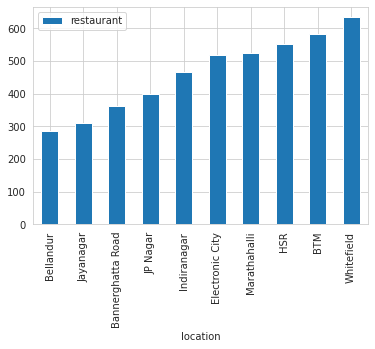

In [187]:
df_total.sort_values(by='restaurant').tail(10).plot.bar()

In [188]:
df_total.sort_values(by='restaurant').tail(10).index

Index(['Bellandur', 'Jayanagar', 'Bannerghatta Road', 'JP Nagar',
       'Indiranagar', 'Electronic City', 'Marathahalli', 'HSR', 'BTM',
       'Whitefield'],
      dtype='object', name='location')

In [189]:
trace1 = go.Bar( 
        x = df_total['restaurant'].nlargest(10).index,
        y = df_total['restaurant'].nlargest(10),
        name= 'Priority')

In [190]:
iplot([trace1])

### Total number of variety of restaurants ie north indian,south Indian

Text(0.5, 1.0, 'Most popular cuisines of Bangalore')

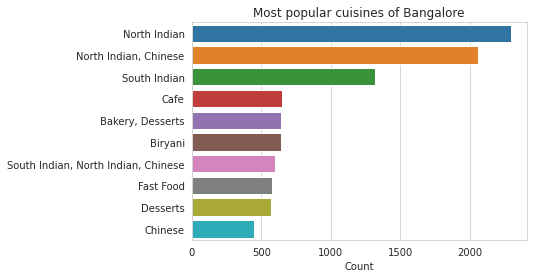

In [191]:
cuisines=df['cuisines'].value_counts()[:10]
sns.barplot(cuisines,cuisines.index)
plt.xlabel('Count')
plt.title("Most popular cuisines of Bangalore")

In [192]:
cuisines=df['cuisines'].value_counts()[:10]
trace1 = go.Bar( 
        x = cuisines.index,
        y = cuisines,
        name= 'Cuisines')

In [193]:
iplot([trace1])

We can observe that North Indian,chinese,South Indian and Biriyani are most common.
It means Bengalore is more influenced by North Indian culture more than South

### Analyse Approx cost for 2 people

In [194]:
len(df['approx_cost(for two people)'].value_counts())

66

In [195]:
df['approx_cost(for two people)'].isna().sum()

252

In [196]:
df.dropna(axis='index',subset=['approx_cost(for two people)'],inplace=True)

In [197]:
df['approx_cost(for two people)'].isna().sum()

0

In [198]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [199]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [200]:
df[~df['approx_cost(for two people)'].apply(is_float)]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
67,https://www.zomato.com/gustoesbeerhouse?contex...,"10, 30th Main, Deve Gowda Petrol Bunk Road, 3r...",Gustoes Beer House,No,No,4.1,868,080 49653521,Banashankari,Pub,"Beer, Wedges, Pizza, Nachos, Salads, Papaya Sa...","Continental, Italian, Mexican, North Indian, C...","1,200","[('Rated 5.0', 'RATED\n Has a really calm roo...",[],Delivery,Banashankari
119,https://www.zomato.com/bangalore/k27-the-pub-b...,"27, 27th Cross, 2nd Stage, Banashankari, Banga...",K27 - The Pub,No,No,3.1,30,+91 9980097472,Banashankari,Bar,NaN,"Chinese, North Indian","1,000","[('Rated 4.0', ""RATED\n Convenient and Averag...",[],Delivery,Banashankari
166,https://www.zomato.com/bangalore/patio-805-jay...,"805, Ground Floor, 35C Cross, 9th Main, 4th Bl...",Patio 805,Yes,Yes,4.1,364,+91 8884999805,Jayanagar,Casual Dining,"Noodles, Laksa Soup, Coffee, Veg Fritters, Veg...","Thai, Vietnamese, Asian, Chinese","1,200","[('Rated 4.0', ""RATED\n The number of good re...",[],Delivery,Banashankari
207,https://www.zomato.com/bangalore/chutney-chang...,"Cosmopolitan Club, 22nd Cross, 3rd Block, Jaya...",Chutney Chang,Yes,Yes,4.1,2339,080 22443007\r\n+91 9901967373,Jayanagar,Casual Dining,"Veg Momos, Brownie Chocolate, Palak Chaat, Mut...","North Indian, Chinese, BBQ","1,500","[('Rated 4.0', 'RATED\n Great place for team ...",[],Delivery,Banashankari
217,https://www.zomato.com/bangalore/toscano-jayan...,"359/38,Next to Fabindia, 7th Cross, 1st Block,...",Toscano,Yes,Yes,4.3,1129,080 41558423\r\n+91 7619320074,Jayanagar,Casual Dining,"Pizza, Pasta, Salads, Calamari, Ravioli, Pumpk...","Italian, Salad","1,300","[('Rated 4.0', 'RATED\n Saturday Night Dinner...",[],Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51707,https://www.zomato.com/bangalore/m-bar-bengalu...,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9,77,080 49435000,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,"2,000","[('Rated 4.0', 'RATED\n Went there post dinne...",[],Pubs and bars,Whitefield
51708,https://www.zomato.com/bangalore/keys-cafe-key...,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,No,No,2.8,161,080 39451000\n+91 8884038484,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200","[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [201]:
df['approx_cost(for two people)'].dtype

dtype('O')

In [202]:
df['approx_cost(for two people)']

0          800
1          800
2          800
3          300
4          600
         ...  
51709      800
51711      800
51712    1,500
51715    2,500
51716    1,500
Name: approx_cost(for two people), Length: 43690, dtype: object

In [203]:
type(df['approx_cost(for two people)'][0])

str

In [204]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace(',',''))

In [205]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(int)

### Cost vs Rating

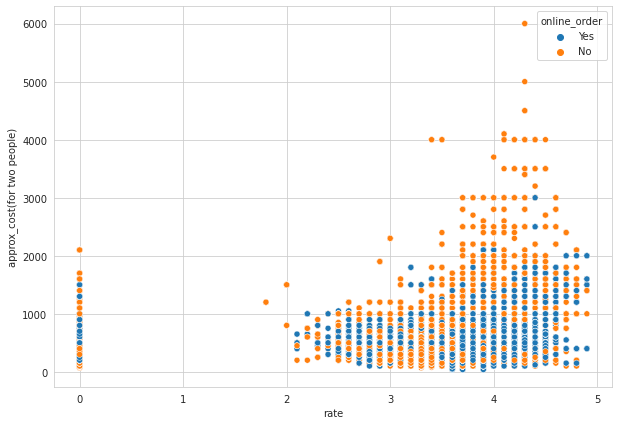

In [206]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="rate",y='approx_cost(for two people)',hue='online_order',data=df)
plt.show()

From this scattterplot,we can come up with a conclusion that most of the highest rated accepts online order and they are budgeted too.

### Which are the foodie areas?

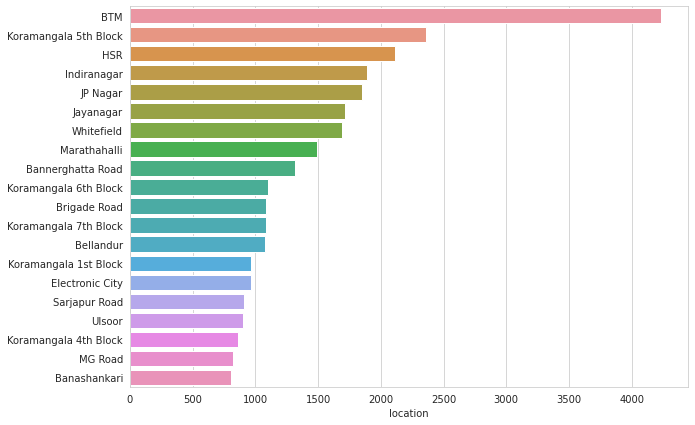

In [207]:
plt.figure(figsize=(10,7))
Restaurant_locations=df['location'].value_counts()[:20]
sns.barplot(Restaurant_locations,Restaurant_locations.index)

### Wordcloud for 1 restaurant

In [208]:
from wordcloud import WordCloud, STOPWORDS

In [209]:
df['update_dish_liked']=df['dish_liked'].apply(lambda x : x.split(',') if type(x)==str else [''])

In [210]:
df['rest_type'].value_counts()[:9].index

Index(['Quick Bites', 'Casual Dining', 'Cafe', 'Dessert Parlor', 'Delivery',
       'Takeaway, Delivery', 'Casual Dining, Bar', 'Bakery', 'Beverage Shop'],
      dtype='object')

In [211]:
rest=df['rest_type'].value_counts()[:9].index

In [212]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                            591
location                           0
rest_type                        149
dish_liked                     20216
cuisines                           8
approx_cost(for two people)        0
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
update_dish_liked                  0
dtype: int64

In [213]:
df.dropna(axis='index',subset=['rest_type'],inplace=True)

In [214]:
df.dropna(axis='index',subset=['dish_liked'],inplace=True)

In [215]:
df.isna().sum()

url                              0
address                          0
name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
phone                          213
location                         0
rest_type                        0
dish_liked                       0
cuisines                         0
approx_cost(for two people)      0
reviews_list                     0
menu_item                        0
listed_in(type)                  0
listed_in(city)                  0
update_dish_liked                0
dtype: int64

In [216]:
data=df[df['rest_type']=='Quick Bites']

In [217]:
data['dish_liked']

3                                              Masala Dosa
31       Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...
34       Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...
40       Dabeli, Faluda, Masala Poori, Sandwiches, Tokr...
42                           Burgers, Fries, Hot Chocolate
                               ...                        
51598                          Potato Fries, Chicken Curry
51601    Rolls, Chicken Tikka Roll, Chicken Bhuna Roll,...
51617                               Coffee, Vada, Mla Dosa
51629                             Fish, Veg Thali, Biryani
51645                                              Burgers
Name: dish_liked, Length: 5269, dtype: object

In [218]:
stopwords=set(STOPWORDS)

(-0.5, 1499.5, 1499.5, -0.5)

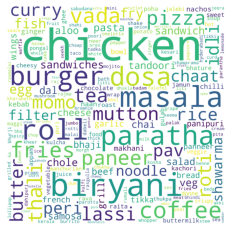

In [219]:
dishes=''
for word in data['dish_liked']:
    words=word.split()
    # Converts each token into lowercase 
    for i in range(len(words)): 
        words[i] = words[i].lower() 
    dishes=dishes+ " ".join(words)+" "
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,stopwords = stopwords,width=1500, height=1500).generate(dishes)
plt.imshow(wordcloud)
plt.axis("off")